In [77]:
#!pip install pytrends
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 10.8 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 3.6 MB/s eta 0:00:00


In [111]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd    
import statsmodels.api as sm
import matplotlib.pyplot as plt                    
from pytrends.request import TrendReq
pytrend = TrendReq(timeout=5)


states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

In [118]:

state_trend_df = pd.DataFrame()
for state in ["AL"]:
    #testdf = pytrend.get_historical_interest(['money'], year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='US-'+state, gprop='', sleep=0)
    #testdf = testdf.reset_index()
    #testdf = testdf.groupby([testdf['date'].dt.date]).agg({ 
    #    "money" : ["sum"]
    #    })
    #testdf.columns = ["_".join(x) for x in testdf.columns.ravel()]
    #testdf = testdf.reset_index()
    testdf = df[df.state=="AL"]
    testdf = testdf.set_index('date')
    testdf = testdf.drop('state',axis=1)
    testdf = testdf.asfreq('D')

    classical_res = sm.tsa.seasonal_decompose(testdf)
    # Extract the trend and seasonal components
    classical_trend = classical_res.trend
    classical_seasonal = classical_res.seasonal

    # Construct the seasonally adjusted series
    testdf['adjusted'] = (testdf['money_sum'] - classical_res.seasonal)
    
    testdf['state'] = state
    state_trend_df = state_trend_df.append(testdf)


    print(state)
# requesting data



AL


In [79]:
df = state_trend_df.groupby([state_trend_df['date'].dt.date,"state"]).agg({ 
  "money" : ["sum"]
  })
print(df.head())
print(df.columns.ravel())
df.columns = ["_".join(x) for x in df.columns.ravel()]
df.head()
df = df.reset_index()

                 money
                   sum
date       state      
2018-01-01 AK      182
           AL      243
           AR      130
           AZ      350
           CA      983
[('money', 'sum')]


In [105]:
grouped = df.set_index('date')
grouped = grouped.asfreq('D')
grouped.head()

classical_res = sm.tsa.seasonal_decompose(grouped)
# Extract the trend and seasonal components
classical_trend = classical_res.trend
classical_seasonal = classical_res.seasonal

# Construct the seasonally adjusted series
classical_adjusted = (grouped['money_sum'] - classical_res.seasonal).rename('seasonally adjusted')

,state,money_sum
date,,
2018-01-01,AK,182
2018-01-01,AL,243
2018-01-01,AR,130
2018-01-01,AZ,350
2018-01-01,CA,983


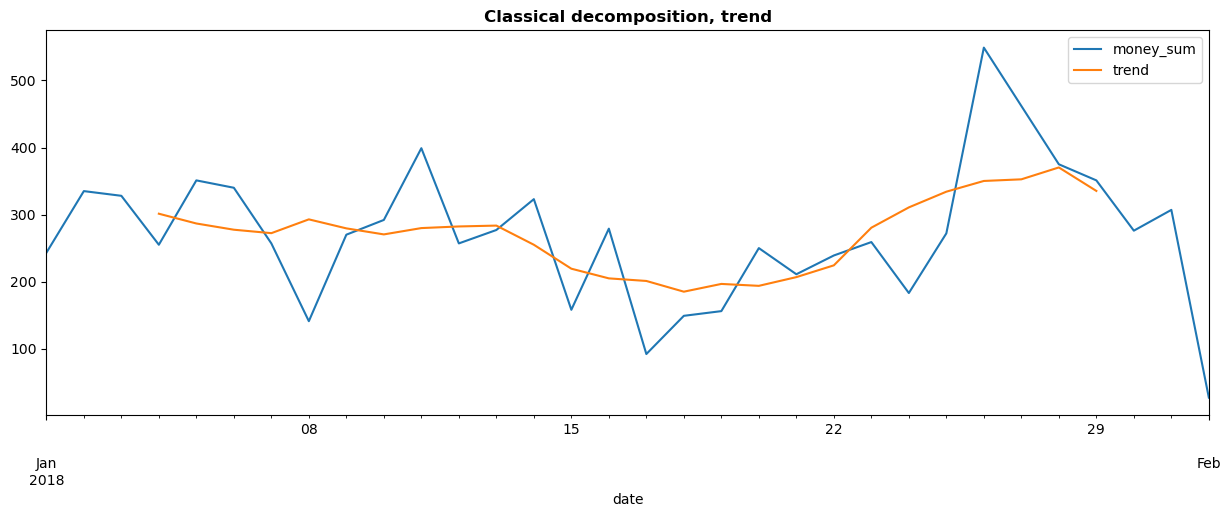

In [99]:
fig, ax = plt.subplots(figsize=(15, 5))

grouped.plot(ax=ax)
classical_trend.plot(ax=ax)
ax.set_title('Classical decomposition, trend', fontsize='large', fontweight='bold');
ax.legend();

In [115]:
testdf = pytrend.get_historical_interest(['money'], year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='US-AL')

The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
